# Lab Deep Learning / Multi-Layer Perceptron for binary-classification / in pytorch

**Author: geoffroy.peeters@telecom-paris.fr**

For any remark or suggestion, please feel free to contact me.



## Objective:

The objective of this lab is to develop a two hidden layers MLP to perform **binary classification**.

We will use a MLP with 2 hidden layer with $n_{h1}=20$ and $n_{h2}=10$ hidden units and ```relu``` activation functions.
You will perform 1000 iterations (epochs) of SGD to find the parameters.

Note: for this lab, we do not separate the dataset into a train, validation and test part.

### Data normalization

You should normalize the data to zero mean and unit standard deviation

### Model

There are various ways to write NN model in pytorch. 

In this lab, you will write three different implementations:
- **Model A**: manually defining the parameters (W1,b1,W2,b2,W3,b3), writing the forward equations, writting the loss equation, calling the .backward() and manually updating the weights using W1.grad. You will write the loop to perform 1000 epochs.
- **Model B**: using the Sequential class of pytorch
- **Model C**: a custom torch.nn.Module class for this.

For Model B and C, you will use the ready made loss and optimization from the nn and optim packages. You can use the same code to optimize the parameters of Model B and C.

### Loss

Since we are dealing with a binary classification problem, we will use a Binary Cross Entropy loss (use ```torch.nn.BCELoss``` for Model B and C).

### Parameters update/ Optimization

For updating the parameters, we will use as optimizer a simple SGD algorithm (use ```torch.optim.SGD``` for Model B and C) with a learning rate of 0.1.

Don't forget that an optimizer is applied to a set of parameters (```my_model.parameters()``` gives the parameters of the network for Model B and C).
Once the gradients have been computed (after the backpropagation has been performed), you can perform one step of optimization (using ```optimizer.step()``` for Model B and C).

### Backward propagation

Backpropagation is automatically performed in pytorch using the ```autograd``` package. 
First, reset the gradients of all parameters (using ```optimizer.zero_grad()``` for Model B and C), then perform the backpropagation ```loss.backward()```. 

## Your task:

You need to add the missing parts in the code (parts between ```# --- START CODE HERE``` and ```# --- END CODE HERE```)

## Documentation:
- NN: https://pytorch.org/docs/stable/nn.html
- Autograd: https://pytorch.org/docs/stable/autograd.html
- Optim: https://pytorch.org/docs/stable/optim.html


## Load the python packages

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # ajouter l'utilisation du relu
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

student = False

In [23]:
print(torch.__version__)

1.2.0


## Dataset

We take the usual circle dataset from sklearn.

In [24]:
from sklearn import datasets
X_np, y_np = datasets.make_circles(n_samples=1000, noise=0.2, factor=0.5)

We convert the ```numpy tensors``` to ```torch tensors```. 
The difference being that the latters allows to do automatic gradient differentiation (back-propagation).

In [25]:
X = torch.from_numpy(X_np).float()
y = torch.from_numpy(y_np).float()
y = y.view(len(y), 1)

In [26]:
print(X.size())
print(y.size())
print(X.mean(dim=0))
print(X.std(dim=0))

torch.Size([1000, 2])
torch.Size([1000, 1])
tensor([ 0.0002, -0.0001])
tensor([0.5933, 0.5842])


## Normalization

In [27]:
X -= X.mean(dim=0)
X /= X.std(dim=0)
print(X.mean(dim=0))
print(X.std(dim=0))

tensor([ 9.4175e-09, -1.2398e-08])
tensor([1.0000, 1.0000])


## Definition of the hyper-parameters

In [28]:
n_in = X.shape[1]
n_h1 = 20
n_h2 = 10
n_out = 1

nb_epoch = 10000
alpha = 0.1

## Model 1 (writing the network equations)

Here, you will define the variables and write the equations of the network yourself (as you would do in numpy).
However you will use ```torch tensors``` instead of ```numpy array```. 

***Why ?*** because torch tensors will allows you to automatically get the gradient. You will use ```loss.backward``` to launch the backpropagation from ```loss```. Then, for all tensors you created and for which you declared ```requires_grad=True```, you will get the gradient of ```loss```with respect to this variable in the field ```.grad```. 

***Example*** ```W1 = torch.tensors(..., requires_grad=True)``` ... ```loss.backward``` will have the gradient $\frac{d Loss}{d W1}$in ```W1.grad```.

Don't forget that the weight matrices should be initialized randomly with small values; while bias vectors can be initialized to zero.

In [32]:
# --- Initialization of W1, b1, ...
if student:
    # --- START CODE HERE
    W1 = ...
    W1.requires_grad = True
    b1 = ...
    
    W2 = ...
    W2.requires_grad = True
    b2 = ...

    W3 = ...
    W3.requires_grad = True
    b3 = ...
    # --- END CODE HERE
else:
    W1 = torch.randn(n_in, n_h1) * 0.01
    W1.requires_grad = True
    b1 = torch.zeros(n_h1, requires_grad=True)
    
    W2 = torch.randn(n_h1, n_h2) * 0.01
    W2.requires_grad=True
    b2 = torch.zeros(n_h2, requires_grad=True)

    W3 = torch.randn(n_h2, n_out) * 0.01
    W3.requires_grad=True
    b3 = torch.randn(n_out, requires_grad=True)

def model(X):
    if student:
        # --- START CODE HERE
        A0 = ...    
        Z1 = ...
        A1 = ...
        Z2 = ...
        A2 = ...
        Z3 = ...
        A3 = ...
        hat_y = ...
        # --- END CODE HERE
    else:
        A0 = X    
        Z1 = torch.add(torch.matmul(A0, W1), b1)
        A1 = F.relu(Z1)
        Z2 = torch.add(torch.matmul(A1, W2), b2)
        A2 = F.relu(Z2)    
        Z3 = torch.add(torch.matmul(A2, W3), b3)
        A3 = F.sigmoid(Z3)
        hat_y = A3
    # --- END CODE HERE
       
    return hat_y

for num_epoch in range(0, nb_epoch):    

    # --- X (n_in, N)
    # --- Y (n_out, N)
    hat_y = model(X)

    # -- We clip hat_y in order to avoid log(0)
    eps = 1e-10
    hat_y = torch.clamp(hat_y, eps, 1-eps)
    
    if student:
        # --- START CODE HERE
        loss = ...
        cost = ...
        # --- END CODE HERE
    else:
        loss = - (y * (hat_y).log() + (1-y) * (1-hat_y).log())
        cost = torch.sum(loss) / y.numel()
    
    if num_epoch % 500 == 0:
        print('epoch {}, loss {}'.format(num_epoch, cost))

    print("b1.grad : ", b1.grad)
    cost.backward()
    print("2 b1.grad : ", b1.grad)
    # --- "with torch.no_grad()" temporarily set all the requires_grad flag to false
    with torch.no_grad():
        if student:
            # --- the gradients dLoss/dW1 is stored in W1.grad, dLoss/db1 is stored in b1.grad, ...
            # --- START CODE HERE
            W1 = ...
            b1 = ...
            W2 = ...
            b2 = ...
            W3 = ...
            b3 = ...
            # --- END CODE HERE
        else:
            W1 -= alpha * W1.grad
            b1 -= alpha * b1.grad
            W2 -= alpha * W2.grad
            b2 -= alpha * b2.grad
            W3 -= alpha * W3.grad
            b3 -= alpha * b3.grad

    # --- We need to set to zero all gradients (otherwise they are cumulated)
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()
    W3.grad.zero_()
    b3.grad.zero_()

epoch 0, loss 0.9210158586502075
b1.grad :  None
2 b1.grad :  tensor([ 1.3458e-05, -3.8704e-06,  1.6867e-05,  5.4473e-06,  1.2786e-05,
        -1.5850e-05,  9.6407e-06, -5.7173e-06, -1.2489e-05,  3.5783e-06,
        -6.6468e-06, -3.8456e-06, -1.4376e-05,  1.8565e-05,  1.4289e-05,
        -3.5671e-06,  5.4670e-06,  5.7430e-06,  9.7182e-06, -1.3833e-05])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.4536e-05, -7.3589e-06,  4.4047e-06,  3.7454e-06,  6.8263e-06,
        -2.0610e-05,  3.1675e-06, -8.5306e-06, -1.1772e-05,  2.5635e-07,
         8.3933e-07, -8.1160e-06, -1.1812e-05,  1.9942e-05,  2.9577e-05,
         4.6280e-06, -1.4969e-05,  1.9772e-05,  9.5244e-06, -1.5083e-05])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.4414e-05, -1.6757e-05,  2.9437e-06,  1.0410e-05,  7.4069e-06,
        -2.2920e-05, -5.0216e-06, -6.6720e-06,  2.848

2 b1.grad :  tensor([ 2.5959e-05, -1.9393e-05,  4.0749e-06,  1.1851e-05,  1.6458e-06,
        -1.6929e-05, -1.1259e-05, -4.8385e-06,  8.8216e-06, -1.6307e-05,
         1.4084e-05,  2.0464e-06, -1.4308e-05,  1.6995e-05,  5.2098e-05,
         1.1451e-06, -2.6195e-05,  1.4517e-05,  1.8439e-05, -1.2928e-05])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.5580e-05, -1.9268e-05,  4.0569e-06,  1.1677e-05,  1.4437e-06,
        -1.6703e-05, -1.1437e-05, -4.8077e-06,  8.6979e-06, -1.6392e-05,
         1.3896e-05,  2.0741e-06, -1.4159e-05,  1.6747e-05,  5.1447e-05,
         1.0164e-06, -2.5876e-05,  1.4425e-05,  1.8345e-05, -1.2631e-05])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.5225e-05, -1.9227e-05,  4.1847e-06,  1.1285e-05,  1.2920e-06,
        -1.6589e-05, -1.1602e-05, -4.7447e-06,  8.6934e-06, -1.6379e-05,
         1.3814e-05,  2.2392e

2 b1.grad :  tensor([ 7.7148e-06, -8.4697e-06,  1.6998e-06,  7.4107e-07,  9.5395e-07,
        -3.7499e-06, -2.4960e-06, -1.1579e-06,  3.2077e-06, -4.4681e-06,
         3.6717e-06,  9.5852e-07, -3.5122e-06,  4.3217e-06,  9.6653e-06,
         8.9628e-07, -7.8331e-06,  3.0735e-06,  3.5908e-06, -3.8998e-06])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 7.5501e-06, -8.3499e-06,  1.7127e-06,  6.3994e-07,  9.2530e-07,
        -3.6457e-06, -2.4558e-06, -1.1275e-06,  3.1735e-06, -4.4031e-06,
         3.6148e-06,  9.5697e-07, -3.4222e-06,  4.2069e-06,  9.3170e-06,
         8.9897e-07, -7.7070e-06,  2.9783e-06,  3.4538e-06, -3.8063e-06])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 7.3841e-06, -8.2910e-06,  1.7348e-06,  5.7155e-07,  8.9805e-07,
        -3.5340e-06, -2.4160e-06, -1.1152e-06,  3.1121e-06, -4.3282e-06,
         3.4740e-06,  9.4663e

b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 1.5622e-06, -3.6831e-06,  5.1386e-07, -2.2907e-06,  3.5461e-07,
        -9.6365e-08, -5.8512e-07, -2.8562e-07,  8.8238e-07, -1.0468e-06,
         2.9872e-07,  1.7029e-07, -2.8349e-07,  7.8530e-07, -2.3975e-06,
         2.2257e-07, -1.7235e-06,  3.2152e-07,  2.1134e-07, -6.8032e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 1.5411e-06, -3.6316e-06,  4.8287e-07, -2.3574e-06,  3.4893e-07,
        -7.5861e-08, -6.6420e-07, -2.7803e-07,  9.0027e-07, -1.0590e-06,
         3.4051e-07,  2.0077e-07, -2.6620e-07,  7.6123e-07, -2.5267e-06,
         2.8500e-07, -1.6727e-06,  3.0185e-07,  1.8541e-07, -6.6382e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 1.4914e-06, -3.6131e-06,  4.3592e-07, -2.3190e-06,  3.4026e-07,
  

2 b1.grad :  tensor([ 1.2256e-07, -3.0233e-06,  1.7384e-07, -2.9182e-06,  2.0344e-07,
         4.4248e-07, -2.1470e-07, -1.4542e-07,  4.2368e-07, -5.8652e-07,
        -3.4763e-07, -2.2178e-08,  9.1532e-08,  1.9200e-07, -4.2300e-06,
         4.7461e-08, -7.2096e-07, -1.0037e-07, -2.7403e-07, -1.7700e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 9.4200e-08, -3.0148e-06,  1.7698e-07, -3.0011e-06,  2.0200e-07,
         4.4746e-07, -2.8210e-07, -1.4185e-07,  4.8055e-07, -5.8318e-07,
        -2.7740e-07,  3.7706e-08,  9.5909e-08,  1.8565e-07, -4.3537e-06,
         1.4572e-07, -7.2673e-07, -1.8400e-07, -5.4238e-07, -1.7288e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 1.0593e-07, -3.0115e-06,  1.6809e-07, -2.9311e-06,  2.0061e-07,
         4.5232e-07, -2.1185e-07, -1.4162e-07,  4.2116e-07, -5.7993e-07,
        -3.5447e-07, -2.2867e

2 b1.grad :  tensor([-1.5043e-07, -2.7872e-06,  6.7035e-08, -3.1021e-06,  1.6694e-07,
         6.2022e-07, -1.1467e-07, -5.1138e-08,  2.4935e-07, -4.6030e-07,
        -7.3396e-07, -3.7964e-08,  2.2088e-07, -1.3048e-07, -5.3807e-06,
        -3.1697e-08, -1.8465e-07, -2.9297e-07, -5.4579e-07, -4.1556e-08])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-1.5103e-07, -2.7857e-06,  6.6224e-08, -3.1047e-06,  1.6309e-07,
         6.5515e-07, -1.1458e-07, -6.8255e-08,  2.4945e-07, -4.7184e-07,
        -7.3504e-07, -3.8101e-08,  2.2833e-07, -1.7388e-07, -5.3861e-06,
        -3.1744e-08, -1.8318e-07, -2.9444e-07, -5.4785e-07, -4.8414e-08])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-1.5447e-07, -2.7842e-06,  6.5429e-08, -3.1073e-06,  1.6666e-07,
         6.2215e-07, -1.1449e-07, -5.0265e-08,  2.4956e-07, -4.5836e-07,
        -7.3610e-07, -3.8238e

2 b1.grad :  tensor([ 3.3810e-07, -2.9952e-06, -1.1489e-08, -3.2156e-06,  1.7346e-07,
         6.9121e-07, -1.1918e-07, -1.4332e-07,  1.6780e-07, -5.0107e-07,
        -7.3892e-07, -5.0360e-08,  2.4854e-07, -5.2168e-09, -4.4578e-06,
        -1.4174e-07, -2.6644e-08, -5.0922e-07, -5.8525e-07, -1.1452e-08])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.2763e-07, -3.0235e-06,  8.0523e-09, -3.1724e-06,  1.7369e-07,
         6.9126e-07, -3.3924e-08, -1.4329e-07,  1.4413e-07, -4.7601e-07,
        -7.9354e-07, -8.1904e-08,  2.4870e-07, -5.4002e-09, -4.3984e-06,
        -2.0369e-07, -5.3557e-08, -5.0981e-07, -5.8599e-07, -1.1309e-08])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.3779e-07, -2.7864e-06, -1.2094e-08, -3.2191e-06,  1.7393e-07,
         6.9130e-07, -1.1959e-07, -1.4325e-07,  1.6867e-07, -5.0000e-07,
        -7.3982e-07, -5.0525e

2 b1.grad :  tensor([ 3.3288e-07, -2.9822e-06, -2.5078e-08, -3.2930e-06,  1.8475e-07,
         8.0340e-07, -1.3177e-07, -1.4124e-07,  2.1369e-07, -4.7575e-07,
        -8.0754e-07, -5.3978e-08,  2.5302e-07, -6.0082e-09, -4.5348e-06,
        -8.2395e-08,  1.7411e-08, -5.8276e-07, -4.9478e-07, -6.9071e-09])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.2262e-07, -3.0107e-06, -5.4780e-09, -3.2498e-06,  1.8504e-07,
         8.3993e-07, -4.6515e-08, -1.4293e-07,  1.6578e-07, -4.5074e-07,
        -8.6223e-07, -8.5596e-08,  2.5307e-07, -6.0206e-09, -4.4752e-06,
        -2.0645e-07, -3.7167e-08, -5.3323e-07, -4.3270e-07, -6.8652e-09])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.2269e-07, -2.8031e-06, -5.7169e-09, -3.2514e-06,  1.8534e-07,
         8.0307e-07, -4.6759e-08, -1.4126e-07,  1.9049e-07, -4.5026e-07,
        -8.6266e-07, -8.5680e

2 b1.grad :  tensor([ 3.4129e-07, -3.2743e-06, -6.0721e-08, -2.9653e-06,  1.9998e-07,
         8.1898e-07, -2.3582e-07, -1.4584e-07,  2.1870e-07, -4.6936e-07,
        -6.5507e-07, -5.8776e-08,  1.2738e-07,  2.0948e-09, -4.0286e-06,
        -1.4763e-07,  5.4794e-09, -5.0742e-07, -3.9129e-07, -4.1685e-09])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.4144e-07, -3.2736e-06, -6.9145e-08, -2.9633e-06,  2.0030e-07,
         8.1877e-07, -2.3608e-07, -1.5621e-07,  2.1632e-07, -4.6890e-07,
        -6.5032e-07, -5.5791e-08,  1.2739e-07,  2.1482e-09, -4.0304e-06,
        -1.4725e-07,  5.7050e-09, -5.0498e-07, -3.9930e-07, -4.1596e-09])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.4158e-07, -3.2740e-06, -6.1177e-08, -2.9684e-06,  2.0063e-07,
         8.1856e-07, -2.3635e-07, -1.4590e-07,  2.1978e-07, -4.6844e-07,
        -6.5574e-07, -5.8957e

b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.9741e-08, -2.9118e-06, -1.0623e-07, -3.0375e-06,  2.2140e-07,
         7.9794e-07, -2.4949e-07, -1.5772e-07,  2.4455e-07, -4.4427e-07,
        -4.9049e-07, -6.3232e-08,  2.4879e-10,  1.2037e-08, -4.0921e-06,
        -1.4287e-07,  1.2411e-07, -5.2474e-07, -1.4571e-07, -6.3225e-09])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.9265e-08, -2.9117e-06, -1.0650e-07, -3.0391e-06,  2.2669e-07,
         9.1018e-07, -2.4976e-07, -1.3968e-07,  2.4511e-07, -4.3022e-07,
        -4.9074e-07, -6.3333e-08, -6.1781e-09,  5.6389e-08, -4.0935e-06,
        -1.4296e-07,  1.2425e-07, -5.2518e-07, -1.4590e-07,  2.8364e-09])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 4.0212e-08, -3.1180e-06, -1.0677e-07, -3.0407e-06,  2.1712e-07,
  

b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.5009e-08, -3.2056e-06, -6.8369e-08, -3.1177e-06,  2.3736e-07,
         9.2345e-07, -1.7982e-07, -1.5777e-07,  2.7312e-07, -3.9390e-07,
        -4.5001e-07, -6.8518e-08,  3.1264e-10,  1.9687e-08, -5.3855e-06,
        -2.0662e-07,  1.3131e-07, -5.9664e-07, -2.1757e-07,  1.1664e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.5014e-08, -3.2055e-06, -6.8618e-08, -3.1193e-06,  2.3771e-07,
         9.2313e-07, -1.8010e-07, -1.5781e-07,  2.7370e-07, -3.9343e-07,
        -4.5023e-07, -6.8630e-08,  3.1376e-10,  1.9776e-08, -5.3874e-06,
        -2.0669e-07,  1.3146e-07, -5.9708e-07, -2.1777e-07,  1.1662e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.4782e-08, -3.2054e-06, -6.8866e-08, -3.1210e-06,  2.4332e-07,
  

b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.0528e-08, -3.3789e-06, -4.8219e-08, -2.7471e-06,  2.5558e-07,
         9.0021e-07, -2.6530e-07, -8.7588e-08,  2.5297e-07, -3.4074e-07,
        -5.1719e-07, -1.0675e-07,  3.0001e-10,  2.8382e-08, -6.0534e-06,
        -2.7311e-07,  1.1147e-07, -5.7173e-07, -1.6575e-07,  1.1591e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.5160e-08, -3.3792e-06, -4.6830e-08, -2.7486e-06,  2.5720e-07,
         9.0570e-07, -2.6294e-07, -8.7608e-08,  2.5347e-07, -3.4305e-07,
        -5.1743e-07, -1.0703e-07,  3.5864e-10,  2.4862e-08, -6.0556e-06,
        -2.7319e-07,  1.1161e-07, -5.7220e-07, -1.6595e-07,  1.1502e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.5164e-08, -3.2928e-06, -4.7052e-08, -2.8841e-06,  2.5757e-07,
  

b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.5362e-08, -3.6437e-06, -1.4270e-07, -2.9123e-06,  2.7698e-07,
         8.5403e-07, -2.6741e-07, -6.8432e-08,  3.7524e-07, -3.1732e-07,
        -3.9589e-07, -7.7880e-08, -1.3414e-07,  7.6515e-08, -5.6234e-06,
        -1.6095e-07,  1.7770e-07, -6.4779e-07, -2.3924e-07,  1.1337e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.5367e-08, -3.6437e-06, -1.4295e-07, -2.9139e-06,  2.7736e-07,
         8.5370e-07, -2.6742e-07, -6.8449e-08,  3.7578e-07, -3.1684e-07,
        -3.9613e-07, -7.8023e-08, -1.3416e-07,  7.6633e-08, -5.6255e-06,
        -1.6102e-07,  1.7772e-07, -6.4828e-07, -2.3945e-07,  1.1334e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.0595e-08, -3.6432e-06, -1.4487e-07, -2.9156e-06,  2.7642e-07,
  

b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.5888e-07, -4.2608e-06, -2.2194e-07, -3.0402e-06,  2.8553e-07,
         7.9893e-07, -1.2182e-07, -6.5876e-08,  5.0087e-07, -3.0494e-07,
        -1.8631e-07, -8.1945e-08, -1.2830e-07,  3.6313e-07, -5.1158e-06,
        -4.7879e-08,  2.3108e-07, -7.7542e-07, -3.7580e-07,  1.0090e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.5908e-07, -4.3473e-06, -2.2223e-07, -2.9529e-06,  2.9225e-07,
         8.0097e-07, -1.2198e-07, -5.2386e-08,  4.2683e-07, -2.8966e-07,
        -2.9622e-07, -1.4609e-07, -1.3477e-07,  4.1057e-07, -4.9959e-06,
        -2.3588e-07,  1.4708e-07, -6.2628e-07, -1.8886e-07,  1.1155e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.5928e-07, -4.2608e-06, -2.2251e-07, -3.0436e-06,  2.9263e-07,
  

2 b1.grad :  tensor([ 3.7034e-07, -4.5237e-06, -3.3843e-07, -3.0904e-06,  3.1011e-07,
         7.1242e-07, -2.2014e-07, -3.2238e-08,  5.6609e-07, -2.7039e-07,
        -1.6621e-07, -1.1515e-07, -1.3523e-07,  4.7288e-07, -4.4861e-06,
        -5.4854e-08,  2.4670e-10, -6.9324e-07, -2.5847e-07,  1.1136e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.7552e-07, -4.5242e-06, -3.3701e-07, -3.0922e-06,  3.1187e-07,
         7.1833e-07, -2.1777e-07, -3.2247e-08,  5.6670e-07, -2.7288e-07,
        -1.6638e-07, -1.1549e-07, -1.3518e-07,  4.6935e-07, -4.4880e-06,
        -5.4864e-08,  2.4731e-10, -6.9376e-07, -2.5869e-07,  1.1041e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.7573e-07, -4.5242e-06, -3.3733e-07, -3.0940e-06,  3.1227e-07,
         7.1800e-07, -2.1793e-07, -3.2256e-08,  5.6731e-07, -2.7238e-07,
        -1.6656e-07, -1.1567e

        -5.5369e-08,  2.6274e-10, -7.7043e-07, -3.3238e-07,  2.2314e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.7561e-07, -4.7056e-06, -1.8292e-07, -3.1851e-06,  3.3237e-07,
         7.0096e-07, -1.4058e-07, -7.9616e-08,  5.9845e-07, -2.4726e-07,
        -2.4303e-07, -1.2499e-07, -4.0250e-07,  4.8758e-07, -4.5834e-06,
        -5.5380e-08,  2.6051e-10, -7.7098e-07, -3.3261e-07,  2.2307e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.7582e-07, -4.7346e-06, -1.8318e-07, -3.1426e-06,  3.3278e-07,
         7.0062e-07, -1.4075e-07, -8.1383e-08,  5.7405e-07, -2.4675e-07,
        -2.9828e-07, -1.5728e-07, -4.0254e-07,  4.8794e-07, -4.5245e-06,
        -1.1818e-07, -2.7830e-08, -7.2169e-07, -2.7050e-07,  2.2300e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  t

b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-1.8283e-08, -5.4765e-06, -3.4128e-07, -3.3156e-06,  3.4238e-07,
         8.3859e-07,  1.9748e-08, -1.4343e-07,  6.2766e-07, -1.9779e-07,
        -1.9963e-07, -1.0203e-07, -4.1048e-07,  5.0445e-07, -4.0688e-06,
        -5.5853e-08,  2.7376e-10, -8.9886e-07, -4.5973e-07,  2.2402e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-1.8292e-08, -5.4767e-06, -3.4157e-07, -3.3176e-06,  3.4281e-07,
         8.3815e-07,  1.9572e-08, -1.4346e-07,  6.2833e-07, -1.9727e-07,
        -1.9989e-07, -1.0224e-07, -4.1052e-07,  5.0483e-07, -4.0705e-06,
        -5.5864e-08,  2.7254e-10, -8.9943e-07, -4.5997e-07,  2.2395e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-1.8304e-08, -5.4769e-06, -3.4187e-07, -3.3195e-06,  3.5053e-07,
  

2 b1.grad :  tensor([-2.3455e-08, -5.4772e-06, -6.3175e-07, -3.2810e-06,  4.0802e-07,
         5.6146e-07, -3.7672e-09, -7.8756e-08,  8.8503e-07, -1.8457e-07,
         3.3547e-08, -1.0330e-07, -6.8381e-07,  7.2862e-07, -3.5376e-06,
         1.1296e-07, -1.8535e-07, -9.1864e-07, -6.7516e-07,  2.2740e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-2.3478e-08, -5.6234e-06, -6.3207e-07, -3.2830e-06,  3.9297e-07,
         5.5495e-07, -3.9664e-09, -1.1755e-07,  8.8578e-07, -2.1598e-07,
         3.3301e-08, -1.0354e-07, -6.7088e-07,  6.2886e-07, -3.5392e-06,
         1.1298e-07, -1.8538e-07, -8.9427e-07, -6.8826e-07,  2.0289e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-2.3503e-08, -6.1226e-06, -6.3239e-07, -3.2849e-06,  4.0897e-07,
         4.8499e-07,  8.1634e-08, -7.7028e-08,  8.8652e-07, -1.8327e-07,
         3.3055e-08, -1.0378e

b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-4.2193e-08, -7.8686e-06, -6.6637e-07, -3.4418e-06,  4.2047e-07,
         5.0366e-07,  1.2018e-07, -8.4364e-08,  1.0046e-06, -1.7539e-07,
         1.0202e-07, -1.1507e-07, -1.0997e-06,  7.0741e-07, -3.6801e-06,
         1.7152e-07, -2.5029e-07, -8.9764e-07, -7.0454e-07,  3.0976e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-4.2228e-08, -7.8690e-06, -6.6667e-07, -3.4439e-06,  4.3747e-07,
         4.3336e-07,  1.2013e-07, -4.5119e-08,  1.0054e-06, -1.4182e-07,
         1.0177e-07, -1.1535e-07, -1.1129e-06,  8.1025e-07, -3.6818e-06,
         1.7155e-07, -2.5034e-07, -9.2357e-07, -6.9230e-07,  3.3511e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-4.2256e-08, -7.8694e-06, -6.6696e-07, -3.4460e-06,  4.2145e-07,
  

b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-3.5755e-11, -9.5037e-06, -6.8521e-07, -3.2491e-06,  4.4215e-07,
         5.2147e-07,  1.2344e-07, -1.0492e-07,  9.8085e-07, -1.3450e-07,
         7.5340e-10, -1.3646e-07, -1.1096e-06,  6.8592e-07, -3.0199e-06,
         1.1578e-07, -1.9006e-07, -9.2530e-07, -7.4416e-07,  3.0105e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 2.6028e-09, -9.5668e-06, -5.9499e-07, -3.2131e-06,  4.5143e-07,
         4.8600e-07,  1.2956e-07, -8.5052e-08,  9.0768e-07, -1.0000e-07,
        -8.4668e-08, -1.4052e-07, -1.1229e-06,  7.3870e-07, -2.9989e-06,
         5.7872e-08, -1.2663e-07, -9.3879e-07, -7.3826e-07,  3.2749e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-8.4810e-11, -9.5050e-06, -6.8585e-07, -3.2532e-06,  4.4316e-07,
  

b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-1.0766e-09, -1.1417e-05, -6.9793e-07, -3.3308e-06,  4.7122e-07,
         4.7478e-07,  3.5955e-08, -8.7113e-08,  1.0139e-06, -9.0332e-08,
        -1.0964e-08, -1.4865e-07, -9.8178e-07,  7.5893e-07, -3.0771e-06,
         1.1674e-07, -1.9167e-07, -9.6524e-07, -1.1670e-06,  3.0873e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([ 3.7159e-09, -1.1418e-05, -6.8918e-07, -3.3369e-06,  4.8077e-07,
         4.7448e-07,  3.9524e-08, -8.7119e-08,  1.0180e-06, -9.1434e-08,
        -1.6919e-08, -1.5239e-07, -9.7572e-07,  7.5948e-07, -3.0782e-06,
         1.1627e-07, -1.9168e-07, -9.6596e-07, -1.1679e-06,  3.0422e-07])
b1.grad :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
2 b1.grad :  tensor([-1.1297e-09, -1.1594e-05, -6.7885e-07, -3.2909e-06,  4.7227e-07,
  

KeyboardInterrupt: 

## Model 2 (using nn.sequential)

Here, you will use the package ```torch.nn``` which comes with a predefined set of layers. The syntax is close to the one of ```keras```(```Sequential```), but differs in the fact that layers are splitted into the matrix multiplication followed by a non-linear activations (```keras```merge both using the ```Dense```layers).

The model created will have all its parameters accessible as a dictionary and can be accessed using ```model.parameters()```. It is therefore a convenient way to write simple sequential networks.

In [9]:
if student:
    # --- START CODE HERE
    my_model = ...
    # --- END CODE HERE
else:
    my_model = torch.nn.Sequential(
        torch.nn.Linear(n_in, n_h1),
        torch.nn.ReLU(),
        torch.nn.Linear(n_h1, n_h2),
        torch.nn.ReLU(),
        torch.nn.Linear(n_h2, n_out),
        torch.nn.Sigmoid(),
    )

## Model 3 (using a class definition)

Here, you will write the network using the recommended pytroch way; i.e. by defining a class.
This class inherit from the main class ```torch.nn.Module```.
You only need to write the ```__init__``` method and the ```forward``` method.

In object programming, the ```__init__``` method defines the attributes of your class. Since the attributes of your  network are the parameters to be trained (weights and biases), you should declare in the ```__init``` all the layers that involve parameters to be trained (mostly the ```Linear```layers which perform the matrix multiplication).

The ```forward``` method contains the code of the forward pass itself. It can of course call attributes defined in the ```__init___``` method. It is the method used when calling ```model(x)```.

As before, the model created will have all its parameters accessible as a dictionary and can be accessed using ```model.parameters()```. 

Classes are convenient way to write more complex network than what you can do with ```nn.sequential```. Note that you can actually include a ```nn.sequential``` in your class.

In [10]:
class Net(torch.nn.Module):
    def __init__(self, n_in, n_h1, n_h2, n_out):
        super(Net, self).__init__()
        
        if student:
            # --- START CODE HERE
            self.fc1 = ... # hidden layer 1
            self.fc2 = ... # hidden layer 2
            self.fc3 = ...  # output layer
            # --- END CODE HERE
        else:
            self.fc1 = nn.Linear(n_in, n_h1)   # hidden layer 1
            self.fc2 = nn.Linear(n_h1, n_h2)   # hidden layer 2
            self.fc3 = nn.Linear(n_h2, n_out)  # output layer
        
    def forward(self, X):
        
        if student:
            # --- START CODE HERE
            A0 = ...
            A1 = ...   # activation function for hidden layer 1
            A2 = ...   # activation function for hidden layer 2
            A3 = ...   # activation function for output layer
            # --- END CODE HERE
        else:
            A0 = X
            A1 = F.relu(self.fc1(A0))      # activation function for hidden layer 1
            A2 = F.relu(self.fc2(A1))      # activation function for hidden layer 2
            A3 = F.sigmoid(self.fc3(A2))   # activation function for output layer

        return A3

# --- START CODE HERE
my_model = Net(n_in, n_h1, n_h2, n_out)
# --- END CODE HERE

## Criterion and Optimization for model 2 and model 3

The code of Model 1 is self-contained, i.e. it already contains all necessary instruction to perform forawrd, loss, backward and parameter updates.

When using ```nn.sequential``` (model 2) or a class definition of the network (model 3), we still need to define 
- what we will minimize (the loss to be minimized, i.e. Binary-Cross-Entropy). We can of course write the equation of it by hand but pytorch comes with a very large number of pre-build loss functions (within ```torch.nn```)
- how we will minimize the loss, i.e. what parameter update alogirhtms we will use (SGD, momentum). We can of course write the equation of it by hand but pytorch comes with a very large number of pre-build loss functions (within ```torch.nn```)

In [11]:
# --- START CODE HERE
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(my_model.parameters(), lr=alpha, momentum=0.01)
# --- END CODE HERE

## Training for model 2 and 3

Having defined the network, the citerion to be minimized and the optimizer, we then perform a loop over epochs (iterations); at each step we
- compute the forward pass by passing the data to the model: ```haty = model(x)```
- compute the the loss (the criterion)
- putting at zero the gradients of all the parameters of the network (this is important since, by default, pytorch accumulate the gradients over time)
- computing the backpropagation (using as before ```.backward()```)
- performing one step of optimization (using ```.step()```)

epoch 0, loss 0.6981276869773865
epoch 500, loss 0.26921898126602173
epoch 1000, loss 0.2599446475505829
epoch 1500, loss 0.25904637575149536
epoch 2000, loss 0.2586629390716553
epoch 2500, loss 0.2584591507911682
epoch 3000, loss 0.25827252864837646
epoch 3500, loss 0.2580808401107788
epoch 4000, loss 0.2578715980052948
epoch 4500, loss 0.25770339369773865
epoch 5000, loss 0.25754040479660034
epoch 5500, loss 0.2573818266391754
epoch 6000, loss 0.2572231590747833
epoch 6500, loss 0.2570708692073822
epoch 7000, loss 0.25691699981689453
epoch 7500, loss 0.2566978335380554
epoch 8000, loss 0.2564961016178131
epoch 8500, loss 0.25634461641311646
epoch 9000, loss 0.25619804859161377
epoch 9500, loss 0.2560320198535919


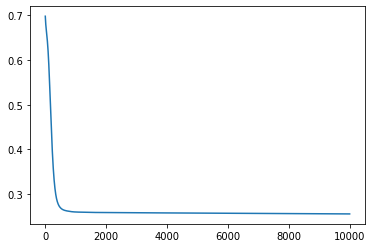

In [12]:
loss_l = []
for num_epoch in range(nb_epoch):
  
    if student:
        # --- START CODE HERE
        hat_y = ... # Forward pass: Compute predicted y by passing  x to the model          
        loss = ... # Compute loss 
        # Zero gradients, perform a backward pass, and update the weights. 
        ... # re-init the gradients (otherwise they are cumulated)
        ... # perform back-propagation
        ... # update the weights
        # --- END CODE HERE
    else:        
        hat_y = my_model(X)        # Forward pass: Compute predicted y by passing  x to the model 
        loss = criterion(hat_y, y) # Compute loss 
        optimizer.zero_grad()      # re-init the gradients (otherwise they are cumulated)
        loss.backward()            # perform back-propagation
        optimizer.step()           # update the weights
        
    loss_l.append(loss)

    if num_epoch % 500 == 0:
        print('epoch {}, loss {}'.format(num_epoch, loss.item()))
        
# ----------------
plt.plot(loss_l)        